<a href="https://colab.research.google.com/github/lldckv/cs102/blob/homework06/homework06/%D0%94%D1%8C%D1%8F%D1%87%D0%BA%D0%BE%D0%B2%D0%B0_%D0%9B%D0%B0%D0%B16_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание 1


1. Загрузите датасет `music_genre.csv`.
2. Возьмите 20 тысяч случайных строк из датасета (**все остальные задания выполняйте для этих 20 тысяч строк!!!**)
3. Проверьте, есть ли в датасете дублирующиеся строки. Если есть, удалите их.
4. Проверьте, есть ли а датасете строки, в которых значение в столбце `artist_name` – `empty_field`. Если есть, выведите эти строки и их количество. А затем удалите из датасета.

In [7]:
install.packages("googledrive")
install.packages("httpuv")
library("googledrive")
library("httpuv")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Rcpp’, ‘promises’, ‘later’




In [8]:
install.packages("R.utils")
library("R.utils")
library("httr")
my_check <- function() {return(TRUE)}
reassignInPackage("is_interactive", pkgName = "httr", my_check) 
options(rlang_interactive=TRUE)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘R.oo’, ‘R.methodsS3’


Loading required package: R.oo

Loading required package: R.methodsS3

R.methodsS3 v1.8.2 (2022-06-13 22:00:14 UTC) successfully loaded. See ?R.methodsS3 for help.

R.oo v1.25.0 (2022-06-12 02:20:02 UTC) successfully loaded. See ?R.oo for help.


Attaching package: ‘R.oo’


The following object is masked from ‘package:R.methodsS3’:

    throw


The following objects are masked from ‘package:methods’:

    getClasses, getMethods


The following objects are masked from ‘package:base’:

    attach, detach, load, save


R.utils v2.12.2 (2022-11-11 22:00:03 UTC) successfully loaded. See ?R.utils for help.


Attaching package: ‘R.utils’


The following object is masked from ‘package:utils’:

    timestamp


The following objects are masked from ‘package:base’:

    cat, commandArgs, getOption, isOpen, nullfile, parse, warnings




In [23]:
install.packages("dplyr")
library("dplyr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [42]:
#1
music <- data.frame(read.csv('/music_genre.csv'))
#2
music_sample_full <- sample_n(music, 20000, replace = FALSE)
#3
if (any(duplicated(music_sample_full))) {
  music_sample_full <- music_sample_full[!duplicated(music_sample_full), ]
}
#4
cat(paste("Строк без артистов: ", nrow(music_sample_full[music_sample_full$artist_name == "empty_field", ])), "\n")
music_sample <- music_sample_full[!(music_sample_full$artist_name == "empty_field"), ]
head(music_sample)

Строк без артистов:  1033 


,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>
1,90400,Cody Jinks,Cast No Stones,56,0.00775,0.498,316020,0.537,3.24e-03,G#,0.1050,-6.602,Major,0.0292,122.965,3-Apr,0.298,Rock
2,65623,Comethazine,My Way,54,0.01510,0.885,-1,0.466,0.00e+00,C#,0.1490,-9.369,Major,0.4600,139.966,4-Apr,0.360,Hip-Hop
4,78939,Ajmw,OldTricks,44,0.27800,0.765,176551,0.427,5.94e-01,B,0.1410,-9.824,Minor,0.0498,87.001,4-Apr,0.630,Jazz
5,66403,Kenny Chesney,Boston,46,0.72200,0.671,256360,0.545,9.72e-06,G,0.0959,-10.976,Major,0.0448,165.908,4-Apr,0.587,Country
6,38192,Leikeli47,Mulita,43,0.03060,0.873,-1,0.562,6.76e-04,B,0.1270,-6.252,Minor,0.2670,108.65299999999999,4-Apr,0.681,Alternative
7,22598,Luke Bryan,"Sunrise, Sunburn, Sunset",69,0.18500,0.472,216093,0.884,0.00e+00,A,0.1780,-2.306,Major,0.0584,159.96,4-Apr,0.718,Country


# Задание 2


1. Выведите долю каждого жанра в датасете.
2. Покажите на горизонтальной столбиковой диаграмме распределение количества треков по жанрам. Выделите контрастным цветом жанр, в котором больше всего песен.
3. Найдите самый танцевальный жанр. У самого танцевального жанра среднее значение показателя danceability должно быть наивысшим.
4. Для каждого жанра определите, какая тональность в нем преобладает – количество треков какой тональность больше (минор или мажор).

In [30]:
install.packages("ggplot2")
library("ggplot2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



         genre    frequency
1               0.005272871
2  Alternative  9.580806749
3        Anime 10.071183760
4        Blues  9.881360401
5    Classical 10.139731084
6      Country 10.044819404
7   Electronic 10.271552861
8      Hip-Hop 10.176641181
9         Jazz 10.118639599
10         Rap  9.912997627
11        Rock  9.796994463
[1] "Rock , Major преобладает:  472 < 1386"
[1] "Hip-Hop , Major преобладает:  873 < 1057"
[1] "Jazz , Major преобладает:  907 < 1012"
[1] "Country , Major преобладает:  231 < 1674"
[1] "Alternative , Major преобладает:  672 < 1145"
[1] "Rap , Major преобладает:  833 < 1047"
[1] "Electronic , Major преобладает:  880 < 1068"
[1] "Blues , Major преобладает:  536 < 1338"
[1] "Classical , Major преобладает:  621 < 1302"
[1] "Anime , Major преобладает:  757 < 1153"
[1] " , Major преобладает:  0 < 0"


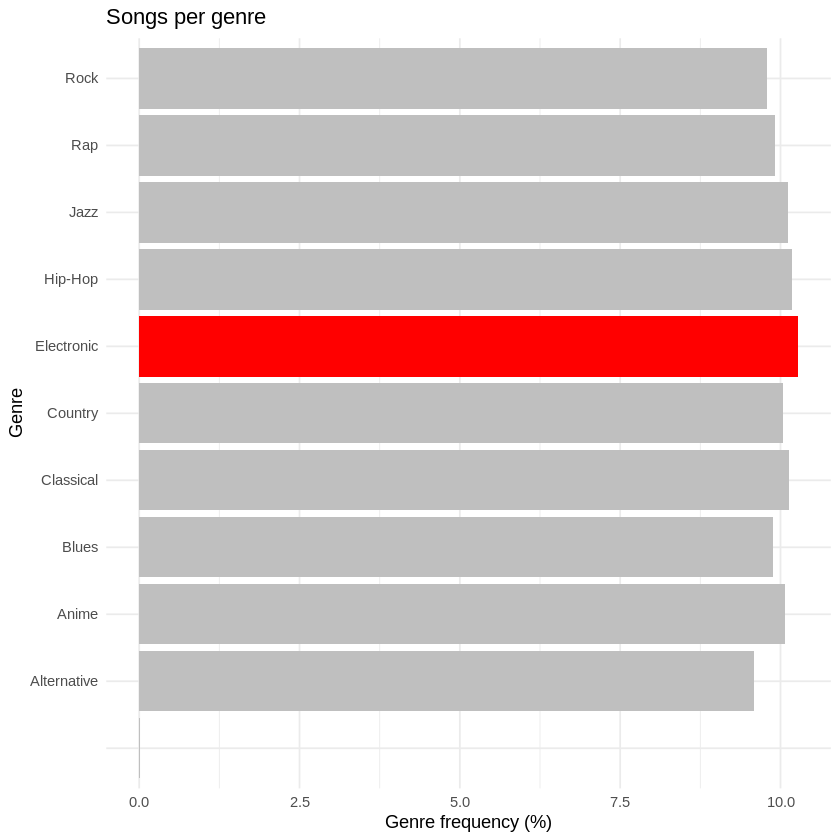

In [55]:
#1
genres_amount <- table(music_sample$music_genre)
genre_fraction <- 100 * genres_amount / nrow(music_sample)
genre_fraction_df <- data.frame(genre = names(genre_fraction), frequency = as.vector(genre_fraction))
print(genre_fraction_df)
#2
p1 <- ggplot(data = genre_fraction_df, aes(x = frequency, y = genre)) +
  geom_bar(stat = "identity", fill = "#bfbfbf") +
  labs(title = "Songs per genre", x = "Genre frequency (%)", y = "Genre") +
  theme_minimal()

tallest_freq <- max(genre_fraction_df$frequency)
tallest_genre <- genre_fraction_df[genre_fraction_df$frequency == tallest_freq, 1]

ggplot(data = genre_fraction_df, aes(x = frequency, y = genre)) +
  geom_bar(stat = "identity", fill = ifelse(genre_fraction_df$genre == tallest_genre, "red", "#bfbfbf")) +
  labs(title = "Songs per genre", x = "Genre frequency (%)", y = "Genre") +
  theme_minimal()

In [60]:
#3
genres <- music_sample$music_genre[!is.na(df$music_genre)]
genre_means <- tapply(music_sample$danceability, music_sample$music_genre, mean)
max_genre <- names(which.max(genre_means))
cat(paste("Название жанра с самым высоким показателем танцевальности:", max_genre))


Название жанра с самым высоким показателем танцевальности: Hip-Hop

In [61]:
#4
genres <- unique(music_sample$music_genre)
md <- c()
music_sample_r <- music_sample[music_sample$mode != "empty_field",]
for (genre in genres) {
  md <- c(md, list(mean(music_sample[music_sample$music_genre == genre, ]$danceability), genre))
  r <- music_sample_r[music_sample_r$music_genre == genre & music_sample_r$mode == "Minor", ]
  if (nrow(r) > nrow(music_sample_r[music_sample_r$music_genre == genre & music_sample_r$mode == "Major", ])) {
    print(paste(genre, ", Minor преобладает: ", nrow(r), ">", nrow(music_sample_r[music_sample_r$music_genre == genre & music_sample_r$mode == "Major", ])))
  } else {
    print(paste(genre, ", Major преобладает: ", nrow(r), "<", nrow(music_sample_r[music_sample_r$music_genre == genre & music_sample_r$mode == "Major", ])))
  }
}

[1] "Rock , Major преобладает:  472 < 1386"
[1] "Hip-Hop , Major преобладает:  873 < 1057"
[1] "Jazz , Major преобладает:  907 < 1012"
[1] "Country , Major преобладает:  231 < 1674"
[1] "Alternative , Major преобладает:  672 < 1145"
[1] "Rap , Major преобладает:  833 < 1047"
[1] "Electronic , Major преобладает:  880 < 1068"
[1] "Blues , Major преобладает:  536 < 1338"
[1] "Classical , Major преобладает:  621 < 1302"
[1] "Anime , Major преобладает:  757 < 1153"
[1] " , Major преобладает:  0 < 0"


# Задание 3


1. Выведите исполнителя, у которого больше всего треков в датасете. И того, у которого их меньше всех.
2. Покажите на горизонтральной столбиковой диаграмме топ-20 исполнителей. Изучите результат и сделайте выводы.
